In [451]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [452]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [453]:
# Downloaded Places2 images are 256x256. 
image_size = 256 # image size

# we will create a directory for Scenes
PATH = "data"

# there should the train and valid directories --> otherwise do symlinks
os.listdir(PATH)

['tmp', 'train', 'models', 'val']

In [454]:
def plots(category, num_imgs, figsize=(18,18), rows=2):
    print(category)
    f = plt.figure(figsize=figsize)
    files = os.listdir(f'{PATH}/train/{category}')[:num_imgs]
    for ii in range(num_imgs):
        img = plt.imread(f'{PATH}/train/{category}/{files[ii]}')
        sp = f.add_subplot(rows, num_imgs//rows, ii+1)
        sp.axis('Off')
        plt.imshow(img)
        

In [455]:
# show me top five categories (directories)
cate_places = sorted(os.listdir(f'{PATH}/train'))
cate_places[:5]

['airfield', 'airplane_cabin', 'airport_terminal', 'alcove', 'alley']

zen_garden


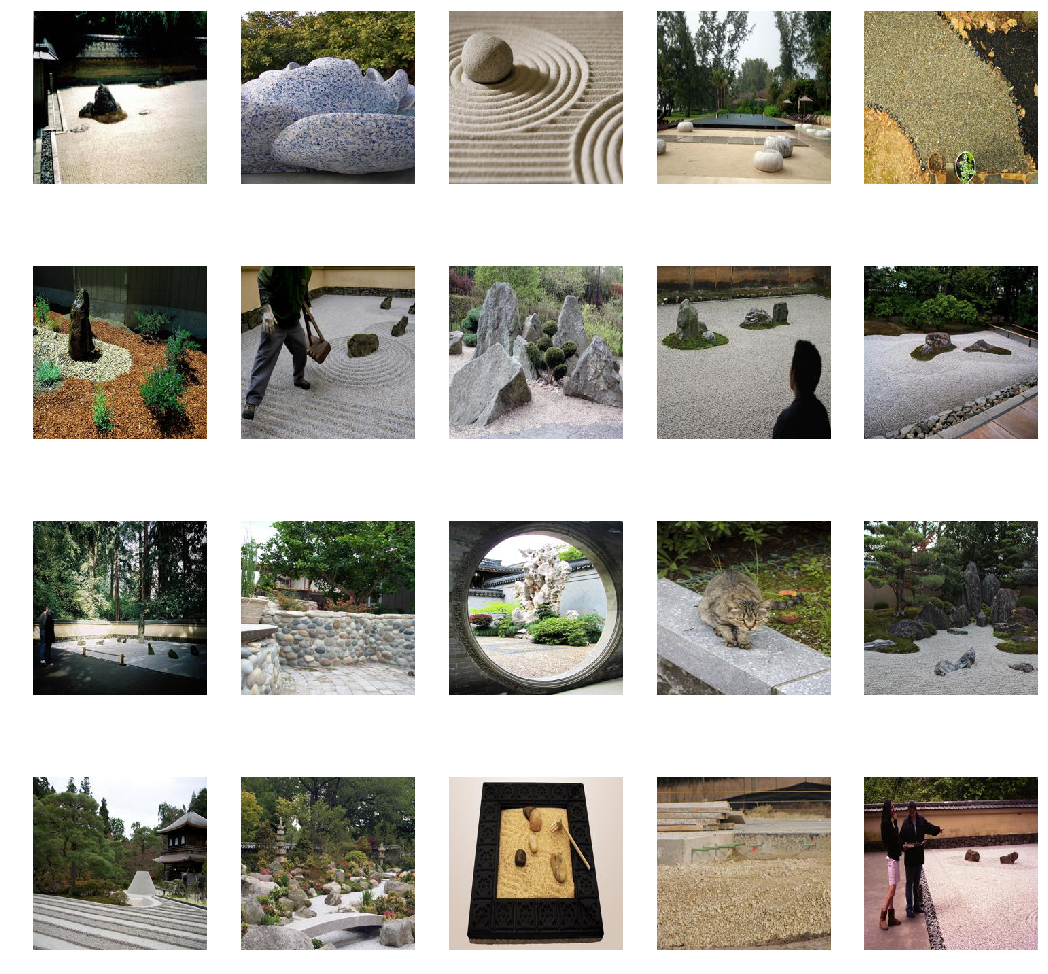

In [456]:
# nature, urban, indoor

ii = 364
plots(cate_places[ii], 20, rows=4)

In [457]:
import csv
with open("category.csv") as f:
    reader = csv.DictReader(f)
    cate_cate = [r for r in reader]

In [458]:
# cound the number of file in each category
total_imgs = dict()
total_imgs["indoor"] = 0
total_imgs["outdoor"] = 0
total_imgs["nature"] = 0
print(total_imgs)

for cate_info in cate_cate:
    files = os.listdir(f'{PATH}/train/{cate_info["category_name"]}')
    cate_info["cnt_file"] = len(files)
    total_imgs[cate_info["tags"]] += len(files)

print(total_imgs)

# well little bit unbalanced, but not too bad



{'indoor': 0, 'outdoor': 0, 'nature': 0}
{'indoor': 760017, 'outdoor': 588986, 'nature': 454457}


In [463]:
# making a csv file, containing new tags
# feeding the csv file only will automatically generate the validation set

# generating a dict file to write to csv
train_csv = []
train_csv.append(['file', 'tags'])
print(train_csv)

for cate_info in cate_cate:
    files = os.listdir(f'{PATH}/train/{cate_info["category_name"]}')
    for file in files:
        train_csv.append([f'{cate_info["category_name"]}/{file}', cate_info["tags"]])


[['file', 'tags']]


In [464]:
len(train_csv)

1803461

In [465]:
train_csv[100000]

['art_gallery/00003172.jpg', 'indoor']

In [466]:
with open('training.csv', 'w') as label_file:
    writer = csv.writer(label_file)
    writer.writerows(train_csv)
    


CSV doesn't seem to work

Copying files 

In [467]:
cate_cate

[OrderedDict([('category_name', 'airfield'),
              ('tags', 'outdoor'),
              ('cnt_file', 5000)]),
 OrderedDict([('category_name', 'airplane_cabin'),
              ('tags', 'indoor'),
              ('cnt_file', 5000)]),
 OrderedDict([('category_name', 'airport_terminal'),
              ('tags', 'indoor'),
              ('cnt_file', 5000)]),
 OrderedDict([('category_name', 'alcove'),
              ('tags', 'indoor'),
              ('cnt_file', 5000)]),
 OrderedDict([('category_name', 'alley'),
              ('tags', 'outdoor'),
              ('cnt_file', 5000)]),
 OrderedDict([('category_name', 'amphitheater'),
              ('tags', 'outdoor'),
              ('cnt_file', 5000)]),
 OrderedDict([('category_name', 'amusement_arcade'),
              ('tags', 'indoor'),
              ('cnt_file', 5000)]),
 OrderedDict([('category_name', 'amusement_park'),
              ('tags', 'outdoor'),
              ('cnt_file', 5000)]),
 OrderedDict([('category_name', 'apartment_buildi

In [468]:
cate_info = cate_cate[0]

In [469]:
cate_info

OrderedDict([('category_name', 'airfield'),
             ('tags', 'outdoor'),
             ('cnt_file', 5000)])

In [473]:
!pwd

/home/kywch/Places365


In [470]:
files = os.listdir(f'{PATH}/train/{cate_info["category_name"]}')

In [471]:
files

['00004096.jpg',
 '00001614.jpg',
 '00001791.jpg',
 '00003990.jpg',
 '00000238.jpg',
 '00002523.jpg',
 '00003518.jpg',
 '00004074.jpg',
 '00003283.jpg',
 '00002762.jpg',
 '00003910.jpg',
 '00002848.jpg',
 '00003513.jpg',
 '00003690.jpg',
 '00002137.jpg',
 '00001988.jpg',
 '00003261.jpg',
 '00000326.jpg',
 '00003401.jpg',
 '00000755.jpg',
 '00001625.jpg',
 '00000733.jpg',
 '00002830.jpg',
 '00000530.jpg',
 '00001493.jpg',
 '00000133.jpg',
 '00002880.jpg',
 '00001309.jpg',
 '00003458.jpg',
 '00004838.jpg',
 '00001893.jpg',
 '00003211.jpg',
 '00000456.jpg',
 '00001817.jpg',
 '00001311.jpg',
 '00002203.jpg',
 '00003368.jpg',
 '00001484.jpg',
 '00000665.jpg',
 '00003797.jpg',
 '00002864.jpg',
 '00002556.jpg',
 '00003452.jpg',
 '00002151.jpg',
 '00001574.jpg',
 '00002098.jpg',
 '00004423.jpg',
 '00001804.jpg',
 '00003765.jpg',
 '00001981.jpg',
 '00004626.jpg',
 '00002242.jpg',
 '00003885.jpg',
 '00004026.jpg',
 '00004823.jpg',
 '00002303.jpg',
 '00001275.jpg',
 '00003860.jpg',
 '00004433.jpg

In [477]:
import shutil

for cate_info in cate_cate:
    print(cate_info["category_name"])
    files = os.listdir(f'{PATH}/val/{cate_info["category_name"]}')
    for file in files:
        shutil.copyfile(f'data/val/{cate_info["category_name"]}/{file}', 
                        f'data/val2/{cate_info["tags"]}/{cate_info["category_name"]}_{file}')


    

airfield
airplane_cabin
airport_terminal
alcove
alley
amphitheater
amusement_arcade
amusement_park
apartment_building-outdoor
aquarium
aqueduct
arcade
arch
archaelogical_excavation
archive
arena-hockey
arena-performance
arena-rodeo
army_base
art_gallery
art_school
art_studio
artists_loft
assembly_line
athletic_field-outdoor
atrium-public
attic
auditorium
auto_factory
auto_showroom
badlands
bakery-shop
balcony-exterior
balcony-interior
ball_pit
ballroom
bamboo_forest
bank_vault
banquet_hall
bar
barn
barndoor
baseball_field
basement
basketball_court-indoor
bathroom
bazaar-indoor
bazaar-outdoor
beach
beach_house
beauty_salon
bedchamber
bedroom
beer_garden
beer_hall
berth
biology_laboratory
boardwalk
boat_deck
boathouse
bookstore
booth-indoor
botanical_garden
bow_window-indoor
bowling_alley
boxing_ring
bridge
building_facade
bullring
burial_chamber
bus_interior
bus_station-indoor
butchers_shop
butte
cabin-outdoor
cafeteria
campsite
campus
canal-natural
canal-urban
candy_store
canyon
car_in

In [ ]:
import shutil


for cate_info in cate_cate:
    print(cate_info["category_name"])
    files = os.listdir(f'{PATH}/train_org/{cate_info["category_name"]}')
    for file in files:
        shutil.copyfile(f'data/train_org/{cate_info["category_name"]}/{file}', 
                        f'data/train2/{cate_info["tags"]}/{cate_info["category_name"]}_{file}')


    

airfield
airplane_cabin
airport_terminal
alcove
alley
amphitheater
amusement_arcade
amusement_park
apartment_building-outdoor
aquarium
aqueduct
arcade
arch
archaelogical_excavation
archive
arena-hockey
arena-performance
arena-rodeo
army_base
art_gallery
art_school
art_studio
artists_loft
assembly_line
athletic_field-outdoor
atrium-public
attic
auditorium
auto_factory
auto_showroom
badlands
bakery-shop
balcony-exterior
balcony-interior
ball_pit
ballroom
bamboo_forest


In [ ]:
for cate_info in cate_cate:
    files = os.listdir(f'{PATH}/train/{cate_info["category_name"]}')
    for file in files:
        train_csv.append([f'{cate_info["category_name"]}/{file}', cate_info["tags"]])